In [2]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
import pandas as pd
import numpy as np
HRData=pd.read_csv('C:\\Users\\ABDUL RAHOOF\\Documents\\IVY pro\\HACHATHONS\\train_LZdllcl.csv', encoding='latin')
print('Shape before deleting duplicate values:', HRData.shape)

# Removing duplicate rows if any
HRData=HRData.drop_duplicates()
print('Shape After deleting duplicate values:', HRData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
HRData.head(10)

Shape before deleting duplicate values: (54808, 14)
Shape After deleting duplicate values: (54808, 14)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [4]:
HRData.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
HRData.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [6]:
HRData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 6.3+ MB


In [7]:
HRData['is_promoted'] = HRData['is_promoted'].apply(str)

In [8]:
# Treating missing values
HRData['education'].fillna(value=HRData['education'].mode()[0],inplace=True)
HRData['previous_year_rating'].fillna(value=HRData['previous_year_rating'].median(),inplace=True)
HRData.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [9]:
HRData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 6.3+ MB


In [10]:
continouscol = ['no_of_trainings', 'age', 'length_of_service', 'avg_training_score', 'previous_year_rating', 'KPIs_met >80%',
                 'awards_won?']
categoricalcol = ['department', 'region', 'education', 'gender', 'recruitment_channel','is_promoted'] 

<AxesSubplot:>

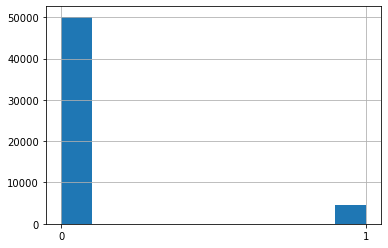

In [11]:
# data visualising
HRData['is_promoted'].hist()

array([[<AxesSubplot:title={'center':'no_of_trainings'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'length_of_service'}>],
       [<AxesSubplot:title={'center':'avg_training_score'}>,
        <AxesSubplot:title={'center':'previous_year_rating'}>,
        <AxesSubplot:title={'center':'KPIs_met >80%'}>],
       [<AxesSubplot:title={'center':'awards_won?'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

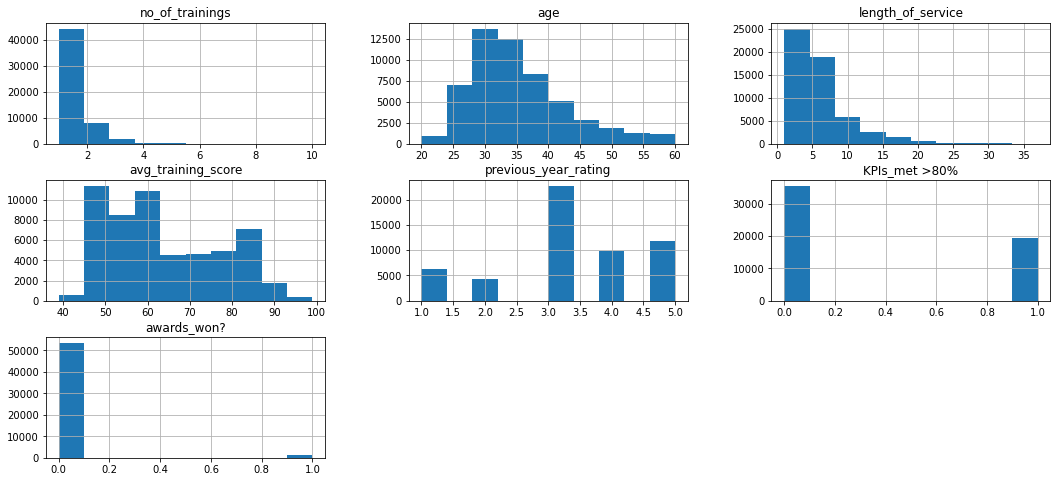

In [12]:
HRData.hist(['no_of_trainings', 'age', 'length_of_service', 'avg_training_score', 'previous_year_rating', 'KPIs_met >80%',
                 'awards_won?'], figsize=(18,8))

In [13]:
# Plotting multiple bar charts at once for categorical variables

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(100,30))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

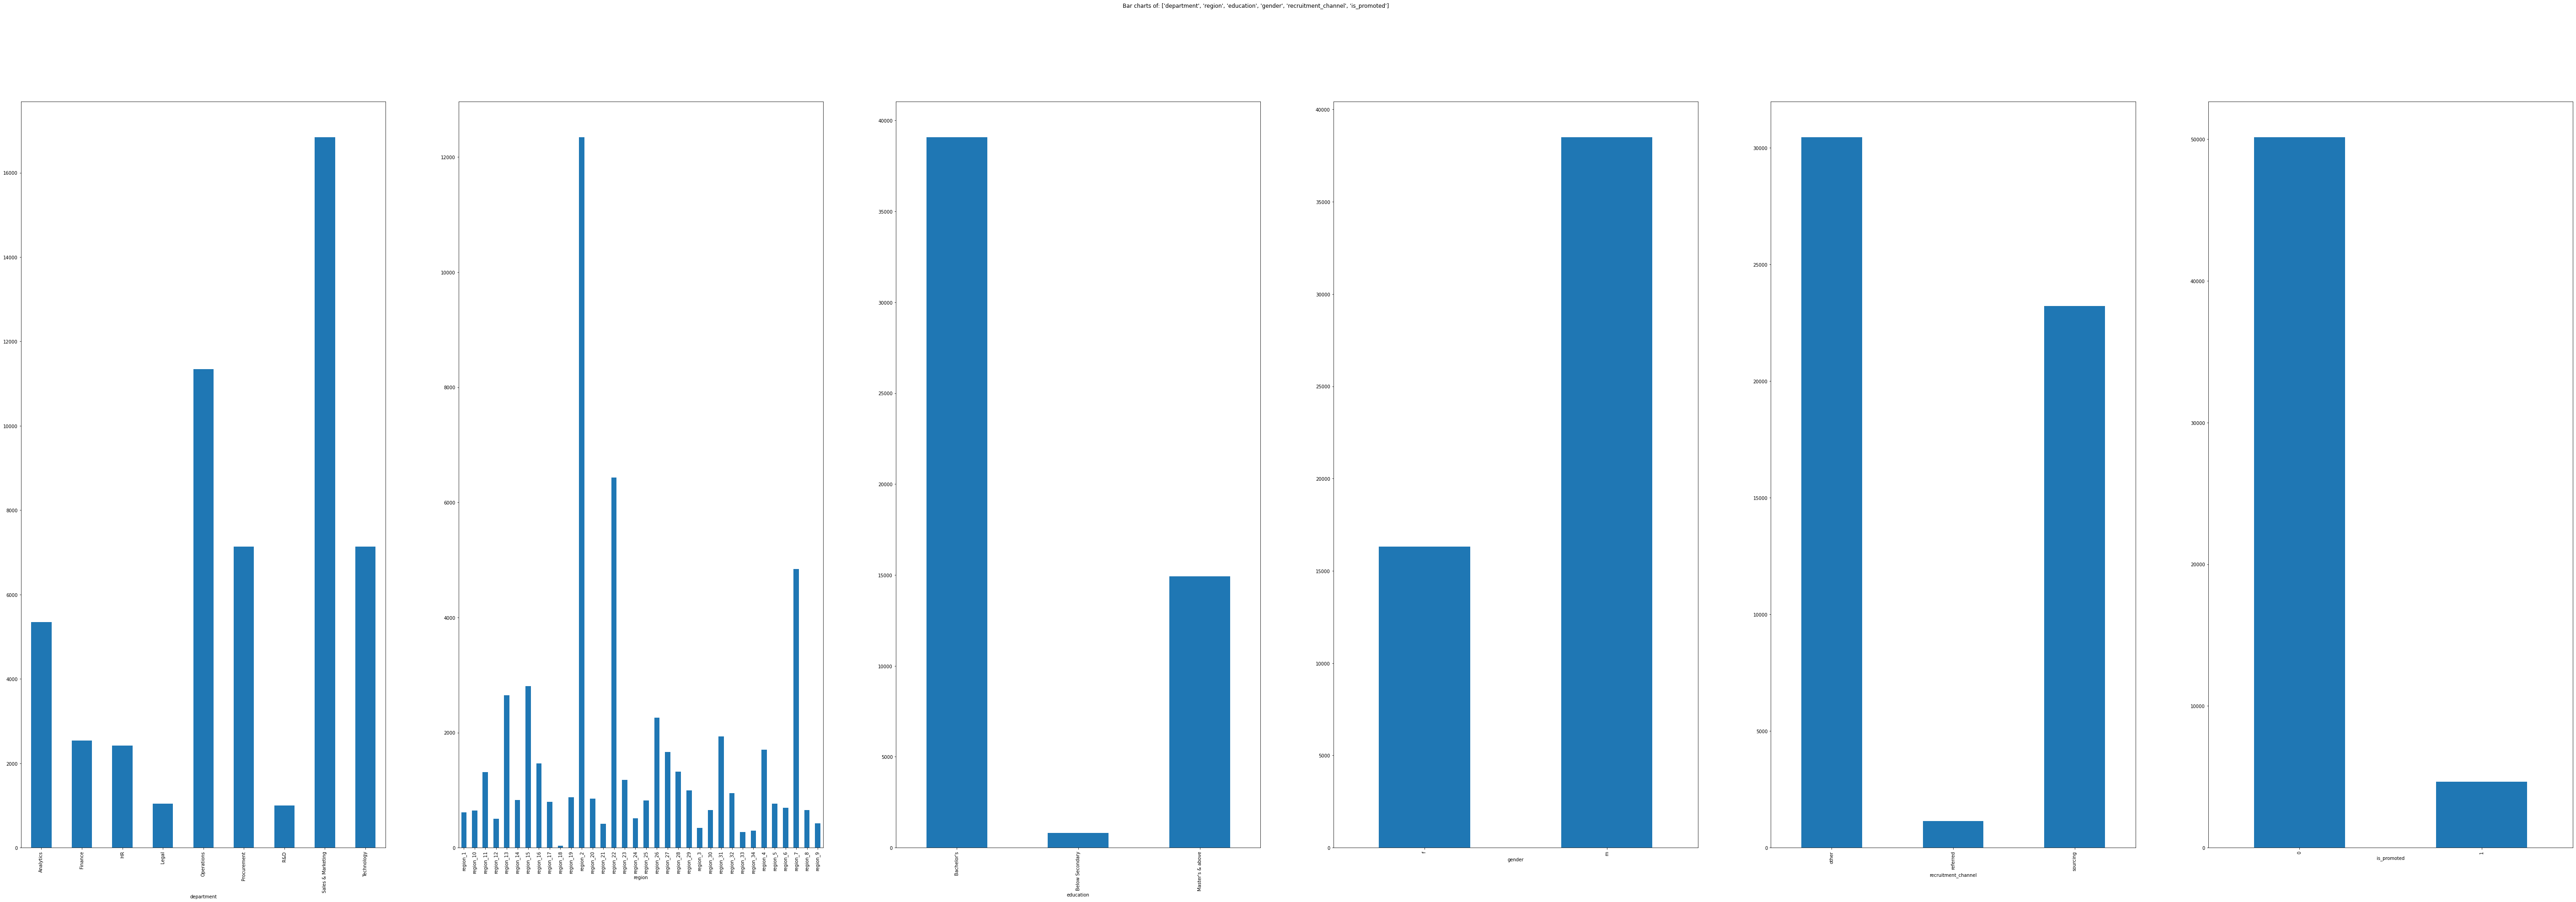

In [37]:
# Calling the function
PlotBarCharts(inpData=HRData, colsToPlot=['department', 'region', 'education', 'gender', 'recruitment_channel', 'is_promoted'] )


In [15]:
# For Continuous vs Categorical Variables - ANOVA TEST

# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [16]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['no_of_trainings', 'age', 'length_of_service', 'avg_training_score', 'previous_year_rating', 'KPIs_met >80%',
                 'awards_won?']
FunctionAnova(inpData=HRData, TargetVariable='is_promoted', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

no_of_trainings is correlated with is_promoted | P-Value: 5.570013982490662e-09
age is correlated with is_promoted | P-Value: 5.846304662318765e-05
length_of_service is correlated with is_promoted | P-Value: 0.012491446010696917
avg_training_score is correlated with is_promoted | P-Value: 0.0
previous_year_rating is correlated with is_promoted | P-Value: 3.854800887658188e-285
KPIs_met >80% is correlated with is_promoted | P-Value: 0.0
awards_won? is correlated with is_promoted | P-Value: 0.0


['no_of_trainings',
 'age',
 'length_of_service',
 'avg_training_score',
 'previous_year_rating',
 'KPIs_met >80%',
 'awards_won?']

In [17]:
# All continuous variables are selected

In [18]:
# For Categorical vs Categorical Variables - CHI-SQUARE TEST

# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [19]:
CategoricalVariables= ['department', 'region', 'education', 'gender', 'recruitment_channel'] 
# Calling the function
FunctionChisq(inpData=HRData, 
              TargetVariable='is_promoted',
              CategoricalVariablesList= CategoricalVariables)

department is correlated with is_promoted | P-Value: 9.882497107474489e-29
region is correlated with is_promoted | P-Value: 7.275378205784026e-80
education is correlated with is_promoted | P-Value: 5.380808967160731e-11
gender is correlated with is_promoted | P-Value: 0.009765091521176657
recruitment_channel is correlated with is_promoted | P-Value: 6.650937825577018e-05


['department', 'region', 'education', 'gender', 'recruitment_channel']

In [20]:
# All categorical variables are selected

In [41]:
# ML Modeling

SelectedColumns=['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age',
                 'length_of_service', 'avg_training_score', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?']

# Selecting final columns
DataForML=HRData[SelectedColumns]
DataForML.head()


,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,avg_training_score,previous_year_rating,KPIs_met >80%,awards_won?
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,8,49,5.0,1,0
1,Operations,region_22,Bachelor's,m,other,1,30,4,60,5.0,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,7,50,3.0,0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,10,50,1.0,0,0
4,Technology,region_26,Bachelor's,m,other,1,45,2,73,3.0,0,0


In [22]:
DataForML.shape

(54808, 12)

In [42]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [65]:
DataForML.head(8)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,avg_training_score,previous_year_rating,KPIs_met >80%,awards_won?
0,Sales & Marketing,4843,3,0,sourcing,1,35,8,49,5.0,1,0
1,Operations,6428,2,1,other,1,30,4,60,5.0,0,0
2,Sales & Marketing,874,2,1,sourcing,1,34,7,50,3.0,0,0
3,Sales & Marketing,1175,2,1,other,2,39,10,50,1.0,0,0
4,Technology,2260,2,1,other,1,45,2,73,3.0,0,0
5,Analytics,12343,2,1,sourcing,2,31,7,85,3.0,0,0
6,Operations,850,2,0,other,1,31,5,59,3.0,0,0
7,Operations,292,3,1,sourcing,1,33,6,63,3.0,0,0


In [43]:
DataForML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   length_of_service     54808 non-null  int64  
 8   avg_training_score    54808 non-null  int64  
 9   previous_year_rating  54808 non-null  float64
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 5.4+ MB


In [51]:
DataForML.nunique()

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
length_of_service       35
avg_training_score      61
previous_year_rating     5
KPIs_met >80%            2
awards_won?              2
dtype: int64

In [45]:
DataForML['gender'].replace({'f': 0, 'm':1}, inplace=True)

In [67]:
pd.get_dummies(DataForML, drop_first=True).shape

(54808, 20)

In [50]:
# Creating value counts of categorical variable with more levels
region_map = DataForML.region.value_counts().to_dict()

# Replacing the levels with value count
DataForML['region'] = DataForML.region.map(region_map)

In [64]:
DataForML['education'].value_counts()

2    39078
3    14925
1      805
Name: education, dtype: int64

In [63]:
# converting Ordinal variable to numerical
order = {"Below Secondary":1, "Bachelor's":2, "Master's & above":3}

DataForML['education'] = DataForML.education.map(order)

In [68]:
# Treating Other nominal Categorical variables with get_dummies

DataForML_Numeric=pd.get_dummies(DataForML, drop_first=True)

# Adding Target variable to the data

DataForML_Numeric['is_promoted'] = HRData['is_promoted']

# Printing sample rows
DataForML_Numeric.head()

,region,education,gender,no_of_trainings,age,length_of_service,avg_training_score,previous_year_rating,KPIs_met >80%,awards_won?,...,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
0,4843,3,0,1,35,8,49,5.0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,6428,2,1,1,30,4,60,5.0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,874,2,1,1,34,7,50,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1175,2,1,2,39,10,50,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2260,2,1,1,45,2,73,3.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [69]:
DataForML_Numeric.columns

Index(['region', 'education', 'gender', 'no_of_trainings', 'age',
       'length_of_service', 'avg_training_score', 'previous_year_rating',
       'KPIs_met >80%', 'awards_won?', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'is_promoted'],
      dtype='object')

# Doing same with test data

In [76]:
HRData_test=pd.read_csv('C:\\Users\\ABDUL RAHOOF\\Documents\\IVY pro\\HACHATHONS\\test_2umaH9m.csv', encoding='latin')


In [77]:
HRData_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [78]:
HRData_test['education'].fillna(value=HRData_test['education'].mode()[0],inplace=True)
HRData_test['previous_year_rating'].fillna(value=HRData_test['previous_year_rating'].median(),inplace=True)
HRData.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [79]:
SelectedColumns=['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age',
                 'length_of_service', 'avg_training_score', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?']

# Selecting final columns
DataForML_test=HRData_test[SelectedColumns]
DataForML_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,avg_training_score,previous_year_rating,KPIs_met >80%,awards_won?
0,Technology,region_26,Bachelor's,m,sourcing,1,24,1,77,3.0,1,0
1,HR,region_4,Bachelor's,f,other,1,31,5,51,3.0,0,0
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,4,47,1.0,0,0
3,Procurement,region_2,Bachelor's,f,other,3,31,9,65,2.0,0,0
4,Finance,region_29,Bachelor's,m,sourcing,1,30,7,61,4.0,0,0


In [80]:
DataForML_test['gender'].replace({'f': 0, 'm':1}, inplace=True)

In [81]:
# Creating value counts of categorical variable with more levels
region_map_t = DataForML_test.region.value_counts().to_dict()

# Replacing the levels with value count
DataForML_test['region'] = DataForML_test.region.map(region_map_t)

In [82]:
# converting Ordinal variable to numerical
order_t = {"Below Secondary":1, "Bachelor's":2, "Master's & above":3}

DataForML_test['education'] = DataForML_test.education.map(order_t)

In [84]:
# Treating Other nominal Categorical variables with get_dummies

DataForML_Numeric_test=pd.get_dummies(DataForML_test, drop_first=True)

# Printing sample rows
DataForML_Numeric_test.head()

,region,education,gender,no_of_trainings,age,length_of_service,avg_training_score,previous_year_rating,KPIs_met >80%,awards_won?,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,recruitment_channel_referred,recruitment_channel_sourcing
0,1011,2,1,1,24,1,77,3.0,1,0,0,0,0,0,0,0,0,1,0,1
1,775,2,0,1,31,5,51,3.0,0,0,0,1,0,0,0,0,0,0,0,0
2,1167,2,1,1,31,4,47,1.0,0,0,0,0,0,0,0,0,1,0,0,0
3,5299,2,0,3,31,9,65,2.0,0,0,0,0,0,0,1,0,0,0,0,0
4,414,2,1,1,30,7,61,4.0,0,0,1,0,0,0,0,0,0,0,0,1


In [89]:
print(DataForML_Numeric.shape)
print(DataForML_Numeric_test.shape)


(54808, 21)
(23490, 20)


In [92]:
DataForML_Numeric.head()

,region,education,gender,no_of_trainings,age,length_of_service,avg_training_score,previous_year_rating,KPIs_met >80%,awards_won?,...,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
0,4843,3,0,1,35,8,49,5.0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,6428,2,1,1,30,4,60,5.0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,874,2,1,1,34,7,50,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1175,2,1,2,39,10,50,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2260,2,1,1,45,2,73,3.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [96]:
X_train = DataForML_Numeric.drop(['is_promoted'], axis=1)
y_train = DataForML_Numeric['is_promoted']

In [98]:
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=200, objective='binary:logistic', booster='gbtree')

print(clf)
XGB=clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[07:32:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [99]:
y_pred = clf.predict(DataForML_Numeric_test)

In [100]:
y_pred

array(['0', '0', '0', ..., '0', '0', '1'], dtype=object)

In [101]:
# creating submission file

pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('C:\\Users\\ABDUL RAHOOF\\Documents\\IVY pro\\HACHATHONS\\sample_submission_M0L0uXE.csv')
dataset = pd.concat([sub_df['employee_id'], pred], axis=1)
dataset.columns = ['employee_id', 'is_promoted']
dataset.to_csv('submission.csv', index=False)